# **Data Collection and Preprocessing**
**Load and Inspect the Dataset**

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Nutrical Dataset.csv')

# Inspect the first few rows
print(df.head())

# Inspect the data types and missing values
print(df.info())
print(df.isnull().sum())


    Category                              Item    Serving Size  Calories  \
0  Breakfast                      Egg McMuffin  4.8 oz (136 g)       300   
1  Breakfast                 Egg White Delight  4.8 oz (135 g)       250   
2  Breakfast                  Sausage McMuffin  3.9 oz (111 g)       370   
3  Breakfast         Sausage McMuffin with Egg  5.7 oz (161 g)       450   
4  Breakfast  Sausage McMuffin with Egg Whites  5.7 oz (161 g)       400   

   Calories from Fat  Total Fat  Total Fat (% Daily Value)  Saturated Fat  \
0                120       13.0                         20            5.0   
1                 70        8.0                         12            3.0   
2                200       23.0                         35            8.0   
3                250       28.0                         43           10.0   
4                210       23.0                         35            8.0   

   Saturated Fat (% Daily Value)  Trans Fat  ...  Carbohydrates  \
0            

# **Handle Missing Values and Data Cleaning**

In [2]:
# Handle missing values (if any)
# For simplicity, let's drop rows with missing values
df.dropna(inplace=True)

# Verify there are no more missing values
print(df.isnull().sum())


Category                         0
Item                             0
Serving Size                     0
Calories                         0
Calories from Fat                0
Total Fat                        0
Total Fat (% Daily Value)        0
Saturated Fat                    0
Saturated Fat (% Daily Value)    0
Trans Fat                        0
Cholesterol                      0
Cholesterol (% Daily Value)      0
Sodium                           0
Sodium (% Daily Value)           0
Carbohydrates                    0
Carbohydrates (% Daily Value)    0
Dietary Fiber                    0
Dietary Fiber (% Daily Value)    0
Sugars                           0
Protein                          0
Vitamin A (% Daily Value)        0
Vitamin C (% Daily Value)        0
Calcium (% Daily Value)          0
Iron (% Daily Value)             0
dtype: int64


# **Analyze the Distribution of Calorie Counts Across Menu Items**

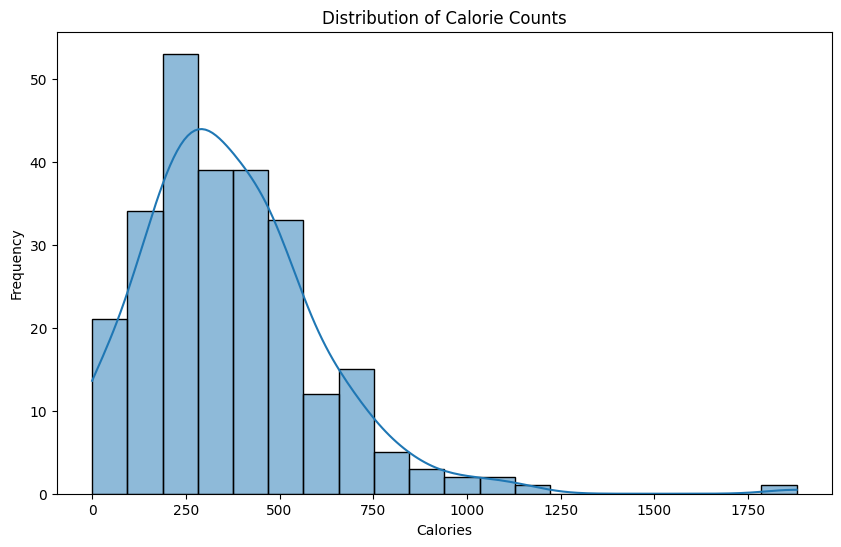

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of calorie counts
plt.figure(figsize=(10, 6))
sns.histplot(df['Calories'], bins=20, kde=True)
plt.title('Distribution of Calorie Counts')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

# **Explore the Nutritional Content of Different Items**

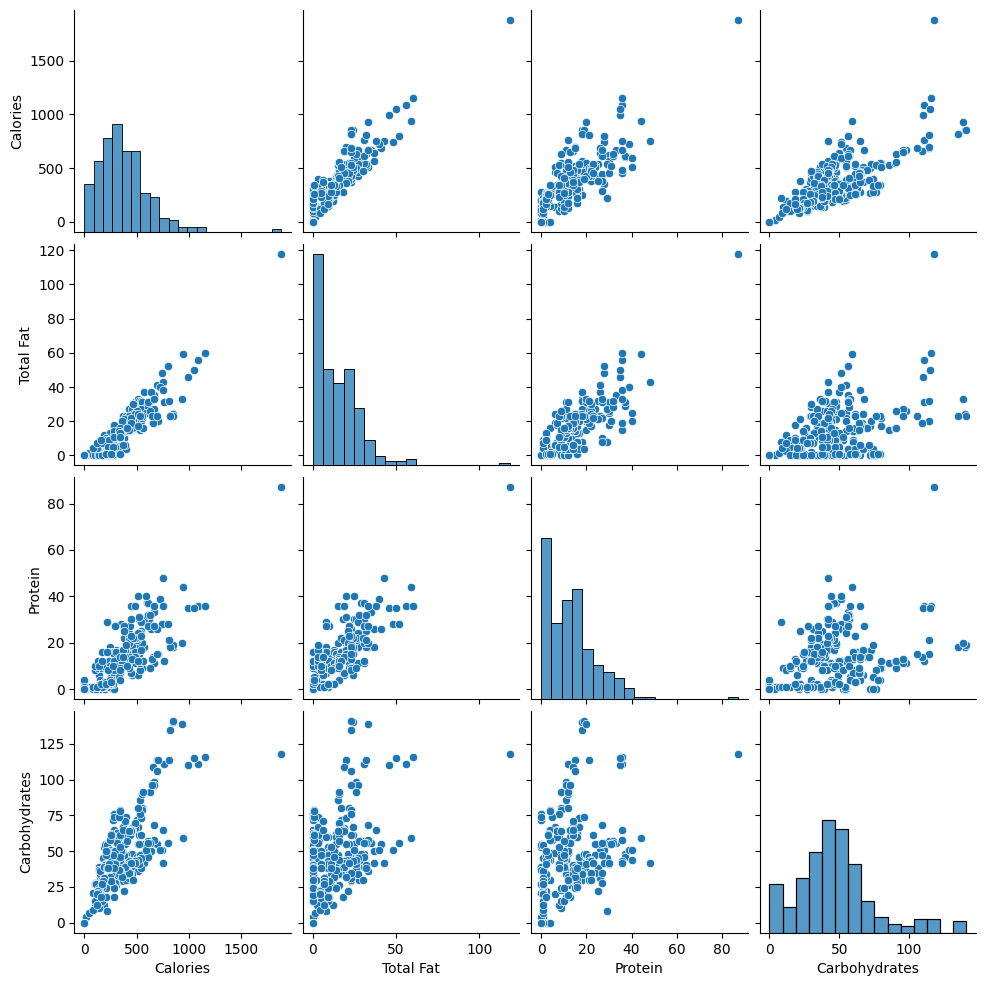

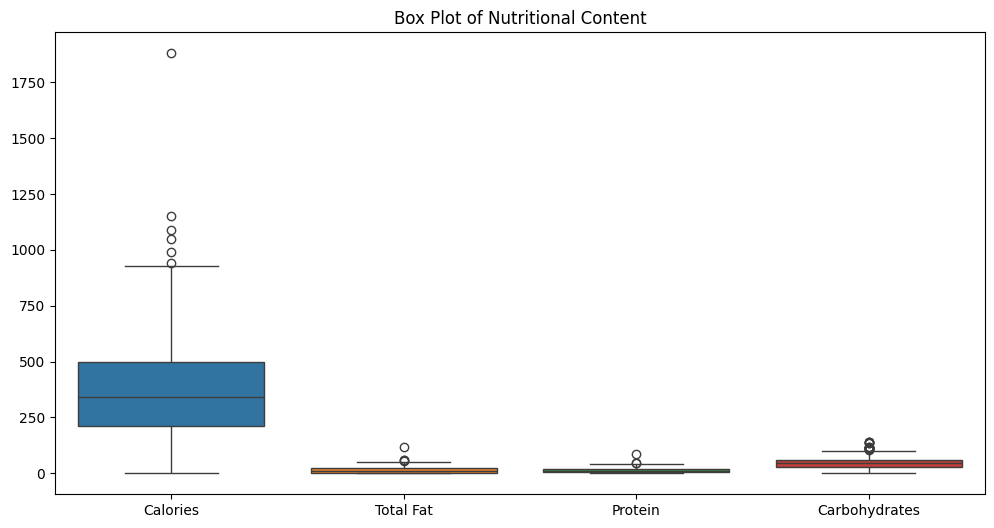

In [4]:
# Pairplot to visualize relationships between nutritional components
sns.pairplot(df[['Calories', 'Total Fat', 'Protein', 'Carbohydrates']])
plt.show()

# Box plot for nutritional components
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Calories', 'Total Fat', 'Protein', 'Carbohydrates']])
plt.title('Box Plot of Nutritional Content')
plt.show()


# **Identify Trends and Patterns**

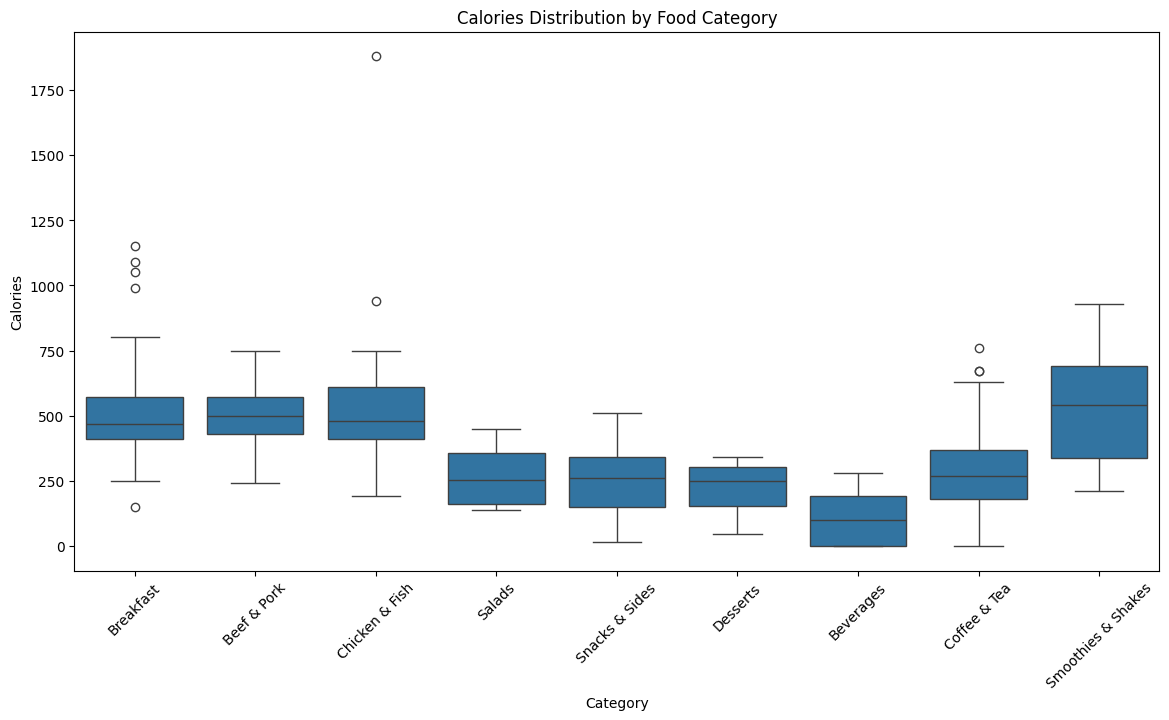

In [5]:
# Trends in nutritional content by category (assuming there's a 'Category' column)
plt.figure(figsize=(14, 7))
sns.boxplot(x='Category', y='Calories', data=df)
plt.title('Calories Distribution by Food Category')
plt.xticks(rotation=45)
plt.show()


# **Create Visualizations for Calorie Distribution and Nutritional Content**

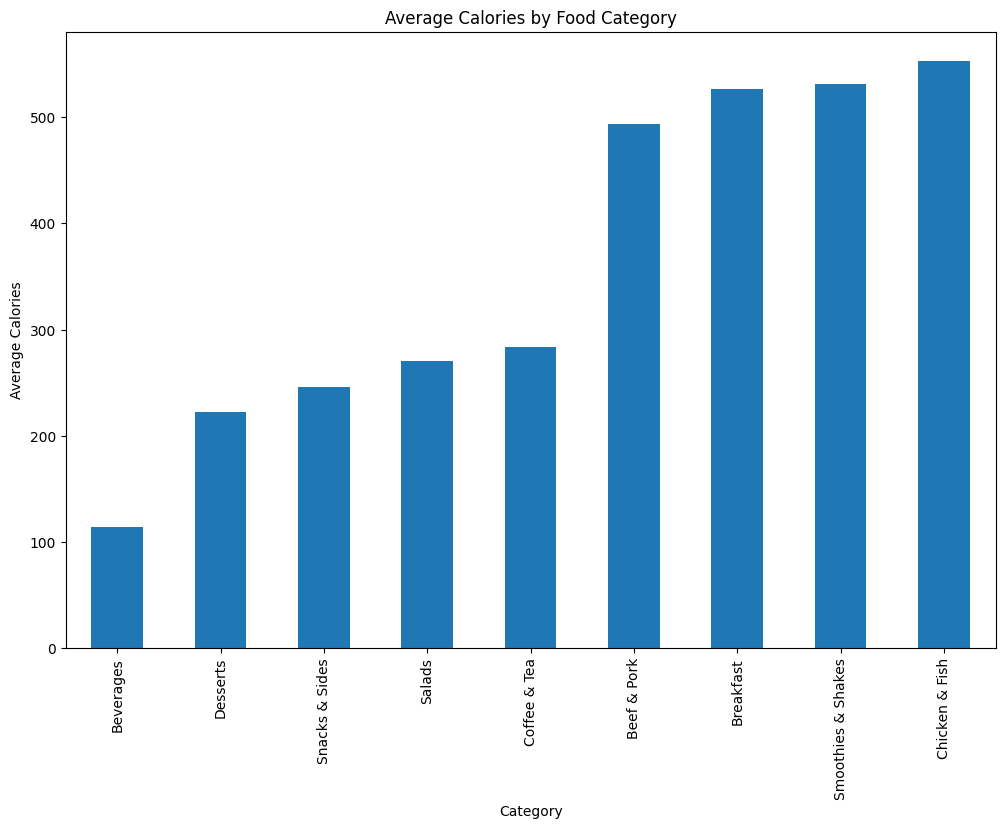

In [6]:
# Bar chart for average calories by category
avg_calories = df.groupby('Category')['Calories'].mean().sort_values()
plt.figure(figsize=(12, 8))
avg_calories.plot(kind='bar')
plt.title('Average Calories by Food Category')
plt.ylabel('Average Calories')
plt.show()


# **Compare Nutritional Characteristics of Different Food Categories**

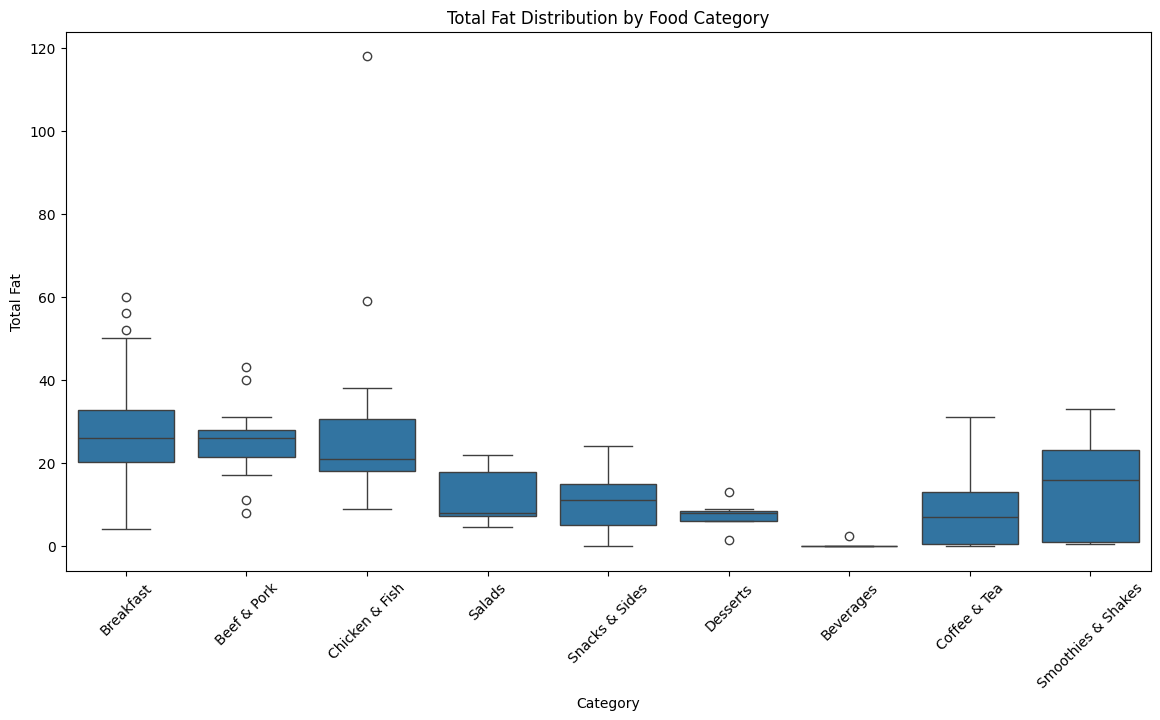

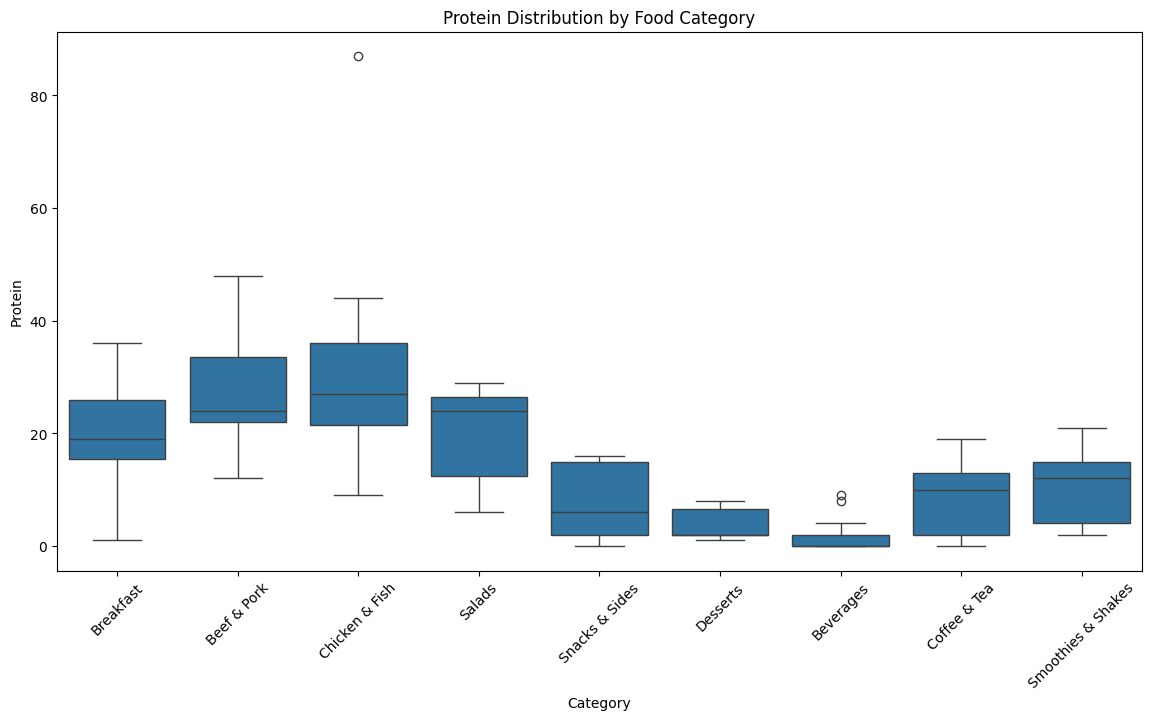

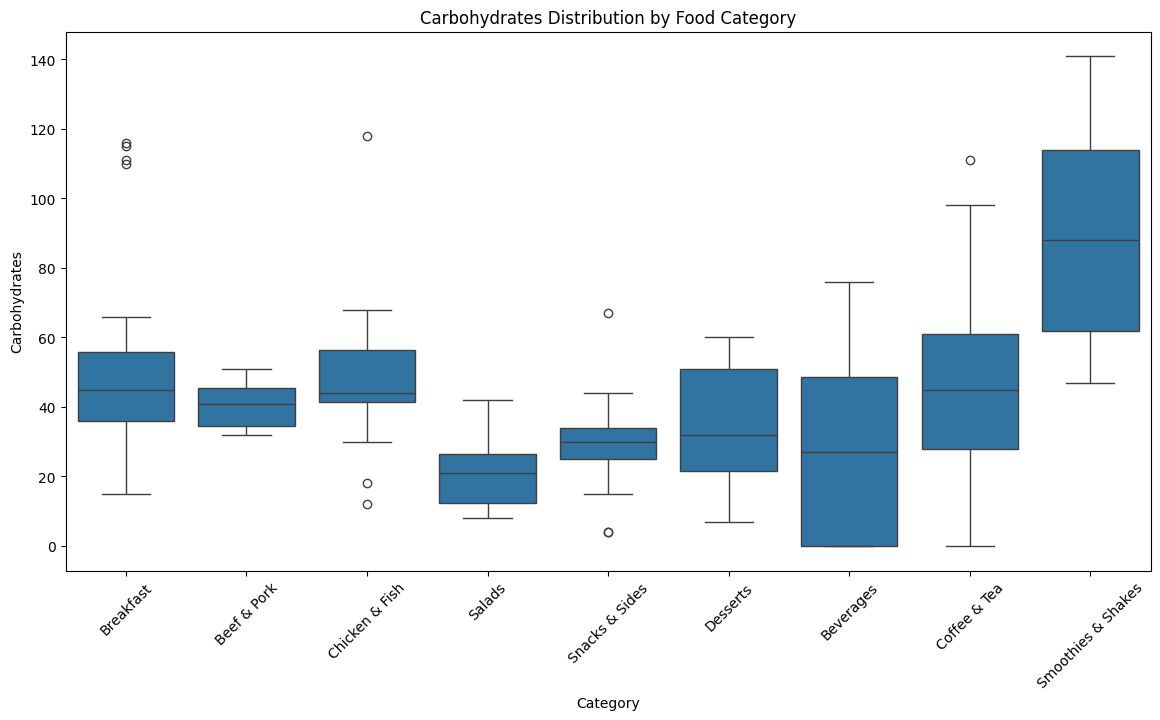

In [7]:
# Box plots for nutritional content by category
nutritional_components = ['Total Fat', 'Protein', 'Carbohydrates']
for component in nutritional_components:
    plt.figure(figsize=(14, 7))
    sns.boxplot(x='Category', y=component, data=df)
    plt.title(f'{component} Distribution by Food Category')
    plt.xticks(rotation=45)
    plt.show()


# **Identify Menu Items with the Highest and Lowest Calorie Counts**

In [8]:
# Items with highest calorie counts
print(df.nlargest(5, 'Calories'))

# Items with lowest calorie counts
print(df.nsmallest(5, 'Calories'))


          Category                                               Item  \
82  Chicken & Fish                       Chicken McNuggets (40 piece)   
32       Breakfast        Big Breakfast with Hotcakes (Large Biscuit)   
31       Breakfast      Big Breakfast with Hotcakes (Regular Biscuit)   
34       Breakfast  Big Breakfast with Hotcakes and Egg Whites (La...   
33       Breakfast  Big Breakfast with Hotcakes and Egg Whites (Re...   

       Serving Size  Calories  Calories from Fat  Total Fat  \
82  22.8 oz (646 g)      1880               1060      118.0   
32  15.3 oz (434 g)      1150                540       60.0   
31  14.8 oz (420 g)      1090                510       56.0   
34  15.4 oz (437 g)      1050                450       50.0   
33  14.9 oz (423 g)       990                410       46.0   

    Total Fat (% Daily Value)  Saturated Fat  Saturated Fat (% Daily Value)  \
82                        182           20.0                            101   
32                      

# **Determine the Average Nutritional Content of Popular Menu Categories**

In [13]:
# Convert relevant columns to numeric, coercing errors to NaN
numeric_columns = ['Calories', 'Total Fat', 'Protein', 'Carbohydrates']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    # Group by 'Category' and calculate mean for numeric columns
avg_nutrition = df.groupby('Category')[numeric_columns].mean()
print(avg_nutrition)

                      Calories  Total Fat    Protein  Carbohydrates
Category                                                           
Beef & Pork         494.000000  24.866667  27.333333      40.133333
Beverages           113.703704   0.092593   1.333333      28.814815
Breakfast           526.666667  27.690476  19.857143      49.761905
Chicken & Fish      552.962963  26.962963  29.111111      49.074074
Coffee & Tea        283.894737   8.021053   8.863158      44.526316
Desserts            222.142857   7.357143   4.000000      34.857143
Salads              270.000000  11.750000  19.833333      21.666667
Smoothies & Shakes  531.428571  14.125000  10.857143      90.428571
Snacks & Sides      245.769231  10.538462   8.384615      29.153846
